Name:  Qingquan Li  
ID: 24263976

# Question-1
For the Iris data
- Use classification Models to predict the species of the flowers
  - kNN Classifier
  - Desicion Tree Classifier
  - Random Forest Classifier
- Try different hyperparameters to improve the scores
- Visualize your results

# Solution-1

In [5]:
from sklearn.datasets import load_iris
dataset_iris = load_iris()

In [6]:
dataset_iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
print(dataset_iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Data Preparation
X_train, X_test, y_train, y_test = train_test_split(dataset_iris.data, dataset_iris.target, test_size=0.3, random_state=42)

In [11]:
# kNN Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(f"kNN Accuracy: {accuracy_score(y_test, y_pred_knn)}")

kNN Accuracy: 1.0


In [12]:
# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt)}")

Decision Tree Accuracy: 1.0


In [13]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")

Random Forest Accuracy: 1.0


In [14]:
# Hyperparameter Tuning using GridSearchCV
# For kNN
param_grid_knn = {'n_neighbors': list(range(1, 31)), 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)
print(f"Best Parameters for kNN: {grid_knn.best_params_}")
print(f"Best Score for kNN: {grid_knn.best_score_}")

Best Parameters for kNN: {'n_neighbors': 18, 'weights': 'distance'}
Best Score for kNN: 0.9619047619047618


In [15]:
# For Decision Tree
param_grid_dt = {'criterion': ['gini', 'entropy'], 'max_depth': list(range(1, 11))}
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
grid_dt.fit(X_train, y_train)
print(f"Best Parameters for Decision Tree: {grid_dt.best_params_}")
print(f"Best Score for Decision Tree: {grid_dt.best_score_}")

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 6}
Best Score for Decision Tree: 0.9428571428571428


In [16]:
# For Random Forest
param_grid_rf = {'n_estimators': [10, 50, 100, 150], 'max_depth': list(range(1, 11)), 'criterion': ['gini', 'entropy']}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)
print(f"Best Parameters for Random Forest: {grid_rf.best_params_}")
print(f"Best Score for Random Forest: {grid_rf.best_score_}")

Best Parameters for Random Forest: {'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 10}
Best Score for Random Forest: 0.9523809523809523


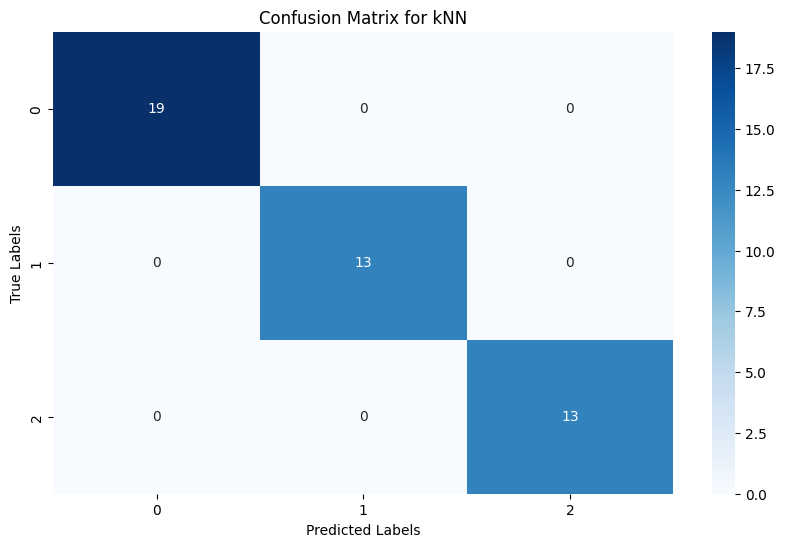

In [21]:
# Visualization
# Confusion Matrix for kNN
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for kNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

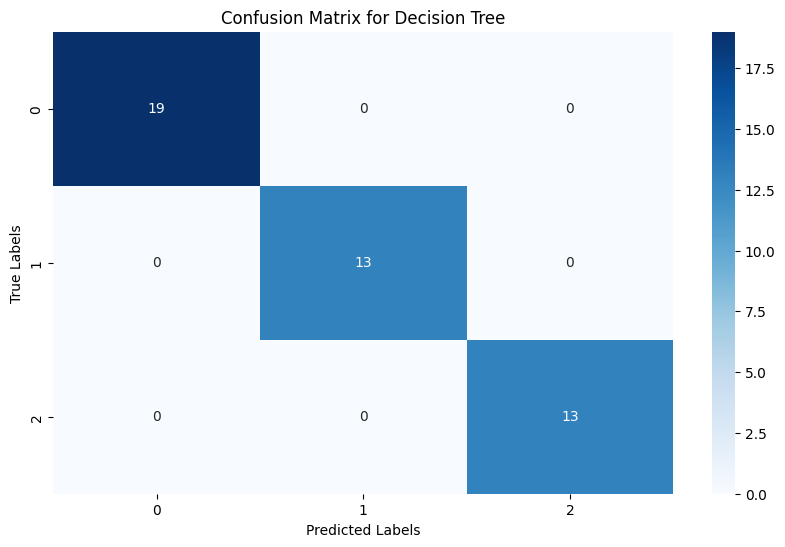

In [22]:
# Confusion Matrix for Decision Tree
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

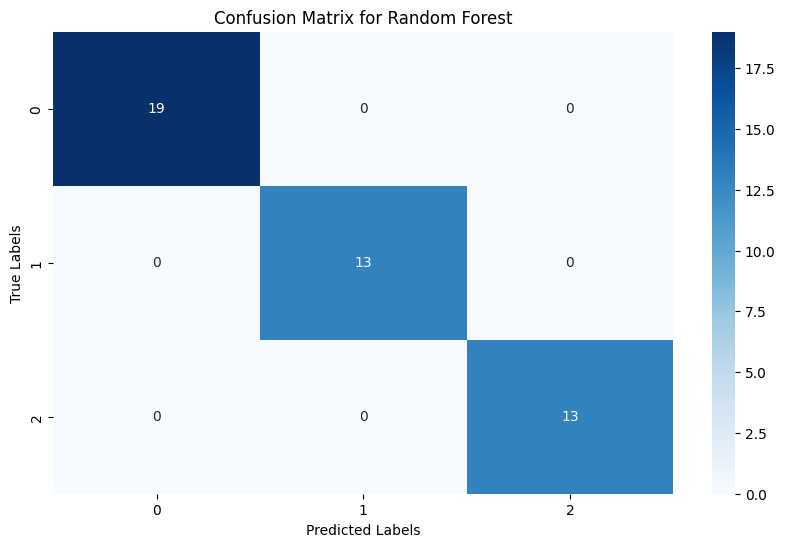

In [23]:
# Confusion Matrix for Random Forest
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Question-2
For the California housing data

- Use Regression Models to predict the house prices
  - kNN Regressor
  - Desicion Tree Regressor
  - Random Forest Regressor
- Try different hyperparameters to improve the scores
- Visualize your results

# Solution-2

In [38]:
from sklearn.datasets import fetch_california_housing
dataset_cal = fetch_california_housing()

In [39]:
dataset_cal.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [40]:
print(dataset_cal.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# Data Preparation
X_train, X_test, y_train, y_test = train_test_split(dataset_cal.data, dataset_cal.target, test_size=0.3, random_state=42)

In [47]:
# kNN Regressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)
print(f"kNN RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_knn))}")

kNN RMSE: 1.066274846880005


In [48]:
# Decision Tree Regressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
print(f"Decision Tree RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_dt))}")

Decision Tree RMSE: 0.7261056432253894


In [49]:
# Random Forest Regressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
print(f"Random Forest RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf))}")

Random Forest RMSE: 0.5047514413266774


In [50]:
# Hyperparameter Tuning using GridSearchCV
# For kNN
param_grid_knn = {'n_neighbors': list(range(1, 31)), 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)
print(f"Best Parameters for kNN: {grid_knn.best_params_}")
print(f"Best Score for kNN: {grid_knn.best_score_}")

Best Parameters for kNN: {'n_neighbors': 9, 'weights': 'distance'}
Best Score for kNN: 0.15630203171866291


In [51]:
# For Decision Tree
param_grid_dt = {'criterion': ['mse', 'friedman_mse', 'mae'], 'max_depth': list(range(1, 11))}
grid_dt = GridSearchCV(DecisionTreeRegressor(), param_grid_dt, cv=5)
grid_dt.fit(X_train, y_train)
print(f"Best Parameters for Decision Tree: {grid_dt.best_params_}")
print(f"Best Score for Decision Tree: {grid_dt.best_score_}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _vali

Best Parameters for Decision Tree: {'criterion': 'friedman_mse', 'max_depth': 8}
Best Score for Decision Tree: 0.680840042764484


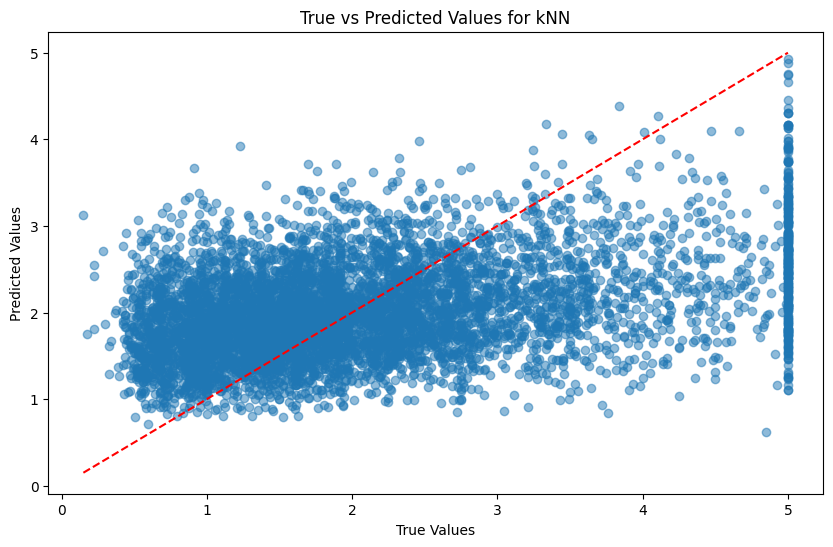

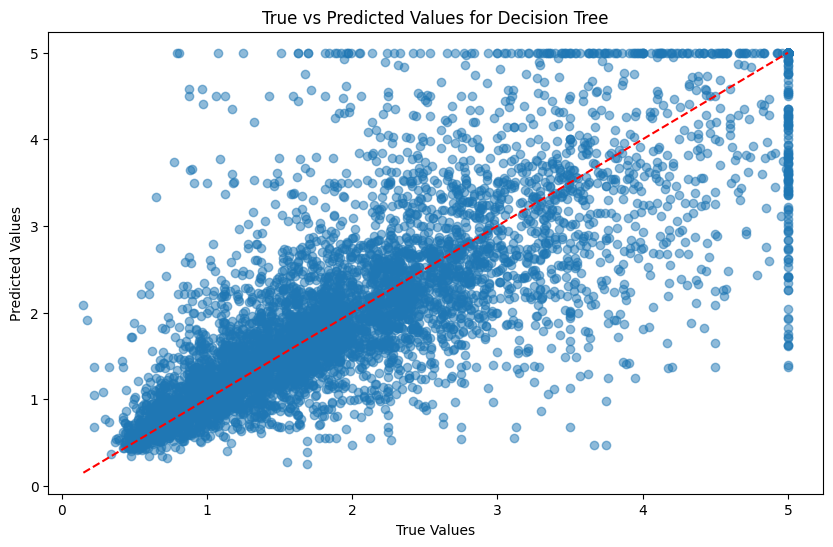

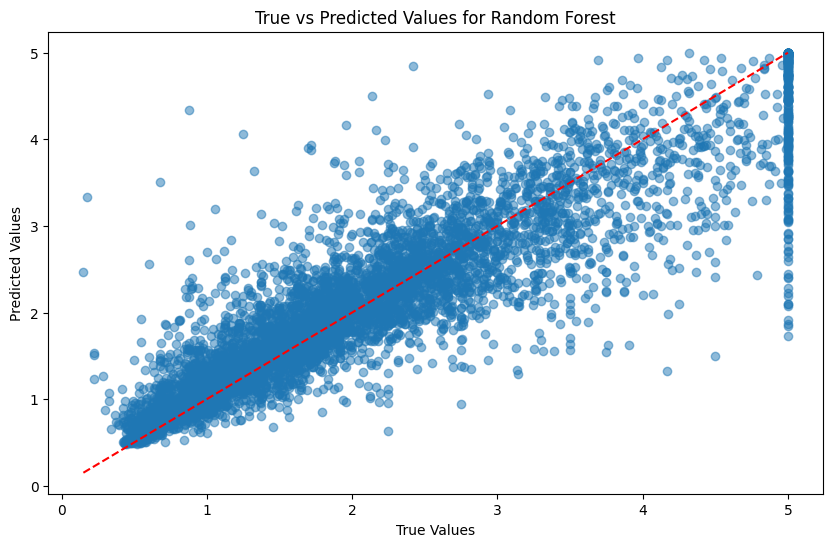

In [53]:
# # For Random Forest
# param_grid_rf = {'n_estimators': [10, 50, 100, 150], 'max_depth': list(range(1, 11)), 'criterion': ['mse', 'mae']}
# grid_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5)
# grid_rf.fit(X_train, y_train)
# print(f"Best Parameters for Random Forest: {grid_rf.best_params_}")
# print(f"Best Score for Random Forest: {grid_rf.best_score_}")

# Visualization
# Scatter plot for kNN
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.title('True vs Predicted Values for kNN')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

# Scatter plot for Decision Tree
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.title('True vs Predicted Values for Decision Tree')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

# Scatter plot for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.title('True vs Predicted Values for Random Forest')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()